In [1]:
import algorithms
import treespace
import logging 
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tracemalloc

In [2]:
def calculate_l(n):
    x = 0
    for i in range(n-1, -1, -2):
        x += 2**i
    return x

In [3]:
def generate_requests(n, a=1.5, size=1000):
    requests_idx = random.zipf(a=a, size=size)
    requests_idx = list(n - requests_idx[requests_idx <= n] + 1)
    while len(requests_idx) < size:
        req_len = len(requests_idx)
        t = size - req_len
        new_reqs = random.zipf(a=a, size=t)
        new_reqs = list(n - new_reqs[new_reqs <= n] + 1)
        requests_idx = np.concatenate((requests_idx, new_reqs))
    reqs = list(map(lambda x: np.random.randint(low=2**(x-1), high=2**(x)), requests_idx))
    return reqs

In [4]:
logging.basicConfig(filename='logs.txt', format='%(levelname)s:%(message)s', level=logging.INFO)

In [5]:
results_df = pd.DataFrame(columns = ["n", "k", "len", "alg", "tree_caching"])
repeats = 10
a = 4
size = 5000
n = 10
tree = treespace.BinaryTree(n)
tree_caching = algorithms.TreeCaching(tree)
for repeat in range(repeats):
    print("-- repeat =", repeat) 
    requests_idx = generate_requests(n, a=a, size=size)
    req_len = len(requests_idx)
    requests = list(map(lambda x: tree.nodes[x - 1], requests_idx))
    
    for k in range(4, 2**(n-1), 1):
        print("---- k =", k)
        tracemalloc.start()
        alg = algorithms.RandomBucket(tree)
        alg_cost = alg.serve_requests(requests, k, calculate_l(n), 1)
        (alg_current, alg_peak) = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        print("------ alg peak=", alg_peak)

        tracemalloc.start()
        tree_caching = algorithms.TreeCaching(tree)
        tree_c_cost = tree_caching.serve_requests(requests, k, 1)
        (tc_current, tc_peak) = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        
        print("------ tc peak=", tc_peak)
        temp_df = pd.DataFrame([[n,k,req_len,alg_peak,tc_peak]], columns=['n','k','len','alg','tree_caching'])
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

-- repeat = 0
---- k = 4
------ alg peak= 15015
------ tc peak= 302690
---- k = 5
------ alg peak= 11758
------ tc peak= 304594
---- k = 6
------ alg peak= 11846
------ tc peak= 302589
---- k = 7
------ alg peak= 12190
------ tc peak= 304578
---- k = 8
------ alg peak= 12118
------ tc peak= 304618
---- k = 9
------ alg peak= 11944
------ tc peak= 304504
---- k = 10
------ alg peak= 12118
------ tc peak= 302605
---- k = 11
------ alg peak= 12390
------ tc peak= 304588
---- k = 12
------ alg peak= 12678
------ tc peak= 302533
---- k = 13
------ alg peak= 12134
------ tc peak= 302525
---- k = 14
------ alg peak= 12182
------ tc peak= 304562
---- k = 15
------ alg peak= 12518
------ tc peak= 304610
---- k = 16
------ alg peak= 12054
------ tc peak= 304658
---- k = 17
------ alg peak= 12638
------ tc peak= 304538
---- k = 18
------ alg peak= 12239
------ tc peak= 304523
---- k = 19
------ alg peak= 12726
------ tc peak= 302525
---- k = 20
------ alg peak= 12942
------ tc peak= 302461
---- k

------ tc peak= 302431
---- k = 145
------ alg peak= 23125
------ tc peak= 302157
---- k = 146
------ alg peak= 22686
------ tc peak= 304587
---- k = 147
------ alg peak= 24526
------ tc peak= 300302
---- k = 148
------ alg peak= 26509
------ tc peak= 302487
---- k = 149
------ alg peak= 26285
------ tc peak= 302487
---- k = 150
------ alg peak= 22053
------ tc peak= 302219
---- k = 151
------ alg peak= 21133
------ tc peak= 302431
---- k = 152
------ alg peak= 21557
------ tc peak= 302487
---- k = 153
------ alg peak= 20355
------ tc peak= 302431
---- k = 154
------ alg peak= 20709
------ tc peak= 300302
---- k = 155
------ alg peak= 21462
------ tc peak= 300302
---- k = 156
------ alg peak= 21854
------ tc peak= 300302
---- k = 157
------ alg peak= 24936
------ tc peak= 304531
---- k = 158
------ alg peak= 25094
------ tc peak= 302163
---- k = 159
------ alg peak= 24949
------ tc peak= 300302
---- k = 160
------ alg peak= 26240
------ tc peak= 300302
---- k = 161
------ alg peak= 260

------ alg peak= 31128
------ tc peak= 300134
---- k = 285
------ alg peak= 31304
------ tc peak= 300190
---- k = 286
------ alg peak= 31200
------ tc peak= 300134
---- k = 287
------ alg peak= 31152
------ tc peak= 300246
---- k = 288
------ alg peak= 31104
------ tc peak= 300134
---- k = 289
------ alg peak= 31384
------ tc peak= 300302
---- k = 290
------ alg peak= 31592
------ tc peak= 300246
---- k = 291
------ alg peak= 31194
------ tc peak= 300246
---- k = 292
------ alg peak= 31304
------ tc peak= 304363
---- k = 293
------ alg peak= 32101
------ tc peak= 300190
---- k = 294
------ alg peak= 31552
------ tc peak= 300190
---- k = 295
------ alg peak= 32608
------ tc peak= 300246
---- k = 296
------ alg peak= 33122
------ tc peak= 300134
---- k = 297
------ alg peak= 32368
------ tc peak= 300246
---- k = 298
------ alg peak= 32120
------ tc peak= 300134
---- k = 299
------ alg peak= 31640
------ tc peak= 300190
---- k = 300
------ alg peak= 32093
------ tc peak= 300190
---- k = 3

------ alg peak= 39104
------ tc peak= 300134
---- k = 424
------ alg peak= 39112
------ tc peak= 300134
---- k = 425
------ alg peak= 39176
------ tc peak= 300134
---- k = 426
------ alg peak= 39192
------ tc peak= 300134
---- k = 427
------ alg peak= 38910
------ tc peak= 300078
---- k = 428
------ alg peak= 39496
------ tc peak= 300078
---- k = 429
------ alg peak= 39432
------ tc peak= 300134
---- k = 430
------ alg peak= 39942
------ tc peak= 300134
---- k = 431
------ alg peak= 40056
------ tc peak= 300134
---- k = 432
------ alg peak= 38952
------ tc peak= 301398
---- k = 433
------ alg peak= 39664
------ tc peak= 300078
---- k = 434
------ alg peak= 39256
------ tc peak= 300078
---- k = 435
------ alg peak= 39371
------ tc peak= 300078
---- k = 436
------ alg peak= 39104
------ tc peak= 300078
---- k = 437
------ alg peak= 39278
------ tc peak= 300078
---- k = 438
------ alg peak= 40240
------ tc peak= 300078
---- k = 439
------ alg peak= 40176
------ tc peak= 300078
---- k = 4

------ alg peak= 22950
------ tc peak= 302431
---- k = 56
------ alg peak= 26231
------ tc peak= 302431
---- k = 57
------ alg peak= 23334
------ tc peak= 302431
---- k = 58
------ alg peak= 26526
------ tc peak= 304531
---- k = 59
------ alg peak= 23828
------ tc peak= 302487
---- k = 60
------ alg peak= 25288
------ tc peak= 302487
---- k = 61
------ alg peak= 25359
------ tc peak= 302431
---- k = 62
------ alg peak= 25086
------ tc peak= 304531
---- k = 63
------ alg peak= 25006
------ tc peak= 302431
---- k = 64
------ alg peak= 25326
------ tc peak= 302487
---- k = 65
------ alg peak= 25039
------ tc peak= 302487
---- k = 66
------ alg peak= 27008
------ tc peak= 304587
---- k = 67
------ alg peak= 27440
------ tc peak= 302487
---- k = 68
------ alg peak= 23078
------ tc peak= 302487
---- k = 69
------ alg peak= 24111
------ tc peak= 302487
---- k = 70
------ alg peak= 28030
------ tc peak= 302487
---- k = 71
------ alg peak= 27296
------ tc peak= 302431
---- k = 72
------ alg pea

------ alg peak= 35574
------ tc peak= 300302
---- k = 196
------ alg peak= 36345
------ tc peak= 300246
---- k = 197
------ alg peak= 25578
------ tc peak= 300246
---- k = 198
------ alg peak= 28202
------ tc peak= 304540
---- k = 199
------ alg peak= 28795
------ tc peak= 300302
---- k = 200
------ alg peak= 31798
------ tc peak= 300302
---- k = 201
------ alg peak= 32806
------ tc peak= 300302
---- k = 202
------ alg peak= 31037
------ tc peak= 300246
---- k = 203
------ alg peak= 37498
------ tc peak= 302053
---- k = 204
------ alg peak= 25549
------ tc peak= 302489
---- k = 205
------ alg peak= 39085
------ tc peak= 300302
---- k = 206
------ alg peak= 25232
------ tc peak= 300246
---- k = 207
------ alg peak= 26240
------ tc peak= 300246
---- k = 208
------ alg peak= 28184
------ tc peak= 300246
---- k = 209
------ alg peak= 30336
------ tc peak= 300246
---- k = 210
------ alg peak= 31976
------ tc peak= 300246
---- k = 211
------ alg peak= 32208
------ tc peak= 300302
---- k = 2

------ alg peak= 36270
------ tc peak= 300246
---- k = 335
------ alg peak= 36128
------ tc peak= 300190
---- k = 336
------ alg peak= 34824
------ tc peak= 300134
---- k = 337
------ alg peak= 36154
------ tc peak= 300078
---- k = 338
------ alg peak= 37888
------ tc peak= 300190
---- k = 339
------ alg peak= 39584
------ tc peak= 300190
---- k = 340
------ alg peak= 39230
------ tc peak= 300246
---- k = 341
------ alg peak= 38752
------ tc peak= 300190
---- k = 342
------ alg peak= 38640
------ tc peak= 300190
---- k = 343
------ alg peak= 40970
------ tc peak= 300246
---- k = 344
------ alg peak= 42944
------ tc peak= 300190
---- k = 345
------ alg peak= 44114
------ tc peak= 300302
---- k = 346
------ alg peak= 45402
------ tc peak= 300190
---- k = 347
------ alg peak= 44328
------ tc peak= 300134
---- k = 348
------ alg peak= 35378
------ tc peak= 300134
---- k = 349
------ alg peak= 46744
------ tc peak= 300134
---- k = 350
------ alg peak= 35456
------ tc peak= 300190
---- k = 3

------ alg peak= 41384
------ tc peak= 300078
---- k = 474
------ alg peak= 41376
------ tc peak= 300078
---- k = 475
------ alg peak= 52954
------ tc peak= 300078
---- k = 476
------ alg peak= 41608
------ tc peak= 300078
---- k = 477
------ alg peak= 41392
------ tc peak= 300078
---- k = 478
------ alg peak= 41528
------ tc peak= 300078
---- k = 479
------ alg peak= 41288
------ tc peak= 300078
---- k = 480
------ alg peak= 41584
------ tc peak= 300078
---- k = 481
------ alg peak= 41352
------ tc peak= 300078
---- k = 482
------ alg peak= 41440
------ tc peak= 300078
---- k = 483
------ alg peak= 41384
------ tc peak= 300078
---- k = 484
------ alg peak= 41504
------ tc peak= 300078
---- k = 485
------ alg peak= 41568
------ tc peak= 300023
---- k = 486
------ alg peak= 41632
------ tc peak= 300078
---- k = 487
------ alg peak= 41696
------ tc peak= 300078
---- k = 488
------ alg peak= 41754
------ tc peak= 300078
---- k = 489
------ alg peak= 41824
------ tc peak= 300078
---- k = 4

------ tc peak= 302628
---- k = 106
------ alg peak= 19423
------ tc peak= 302220
---- k = 107
------ alg peak= 22182
------ tc peak= 302427
---- k = 108
------ alg peak= 18065
------ tc peak= 302489
---- k = 109
------ alg peak= 17718
------ tc peak= 302489
---- k = 110
------ alg peak= 19776
------ tc peak= 302489
---- k = 111
------ alg peak= 21886
------ tc peak= 302220
---- k = 112
------ alg peak= 22581
------ tc peak= 302489
---- k = 113
------ alg peak= 17209
------ tc peak= 304588
---- k = 114
------ alg peak= 18964
------ tc peak= 302489
---- k = 115
------ alg peak= 20445
------ tc peak= 302489
---- k = 116
------ alg peak= 20789
------ tc peak= 302489
---- k = 117
------ alg peak= 23405
------ tc peak= 302433
---- k = 118
------ alg peak= 19026
------ tc peak= 302489
---- k = 119
------ alg peak= 17918
------ tc peak= 302489
---- k = 120
------ alg peak= 19053
------ tc peak= 302684
---- k = 121
------ alg peak= 21189
------ tc peak= 302489
---- k = 122
------ alg peak= 239

------ alg peak= 28176
------ tc peak= 300246
---- k = 246
------ alg peak= 28016
------ tc peak= 300246
---- k = 247
------ alg peak= 28186
------ tc peak= 300246
---- k = 248
------ alg peak= 28256
------ tc peak= 300302
---- k = 249
------ alg peak= 28376
------ tc peak= 300246
---- k = 250
------ alg peak= 28214
------ tc peak= 300190
---- k = 251
------ alg peak= 28278
------ tc peak= 300302
---- k = 252
------ alg peak= 28568
------ tc peak= 300246
---- k = 253
------ alg peak= 28896
------ tc peak= 300246
---- k = 254
------ alg peak= 30634
------ tc peak= 300246
---- k = 255
------ alg peak= 31976
------ tc peak= 300302
---- k = 256
------ alg peak= 32640
------ tc peak= 304428
---- k = 257
------ alg peak= 32388
------ tc peak= 300246
---- k = 258
------ alg peak= 33392
------ tc peak= 300190
---- k = 259
------ alg peak= 34121
------ tc peak= 300190
---- k = 260
------ alg peak= 33529
------ tc peak= 300302
---- k = 261
------ alg peak= 30560
------ tc peak= 300134
---- k = 2

------ alg peak= 37464
------ tc peak= 300078
---- k = 385
------ alg peak= 37008
------ tc peak= 300134
---- k = 386
------ alg peak= 37184
------ tc peak= 300134
---- k = 387
------ alg peak= 36914
------ tc peak= 300134
---- k = 388
------ alg peak= 36920
------ tc peak= 300134
---- k = 389
------ alg peak= 36928
------ tc peak= 300134
---- k = 390
------ alg peak= 37104
------ tc peak= 300134
---- k = 391
------ alg peak= 37336
------ tc peak= 300134
---- k = 392
------ alg peak= 37192
------ tc peak= 300134
---- k = 393
------ alg peak= 37128
------ tc peak= 300078
---- k = 394
------ alg peak= 36912
------ tc peak= 300078
---- k = 395
------ alg peak= 37472
------ tc peak= 300134
---- k = 396
------ alg peak= 37432
------ tc peak= 300078
---- k = 397
------ alg peak= 37664
------ tc peak= 300134
---- k = 398
------ alg peak= 37280
------ tc peak= 300134
---- k = 399
------ alg peak= 37288
------ tc peak= 300078
---- k = 400
------ alg peak= 37560
------ tc peak= 300542
---- k = 4

------ tc peak= 302487
---- k = 16
------ alg peak= 8118
------ tc peak= 302431
---- k = 17
------ alg peak= 9014
------ tc peak= 302431
---- k = 18
------ alg peak= 9287
------ tc peak= 302431
---- k = 19
------ alg peak= 8966
------ tc peak= 302431
---- k = 20
------ alg peak= 9086
------ tc peak= 302487
---- k = 21
------ alg peak= 9166
------ tc peak= 304587
---- k = 22
------ alg peak= 8758
------ tc peak= 302431
---- k = 23
------ alg peak= 8932
------ tc peak= 302431
---- k = 24
------ alg peak= 9526
------ tc peak= 304539
---- k = 25
------ alg peak= 9351
------ tc peak= 302487
---- k = 26
------ alg peak= 9478
------ tc peak= 302487
---- k = 27
------ alg peak= 10009
------ tc peak= 302572
---- k = 28
------ alg peak= 9951
------ tc peak= 302431
---- k = 29
------ alg peak= 9175
------ tc peak= 304643
---- k = 30
------ alg peak= 9391
------ tc peak= 302487
---- k = 31
------ alg peak= 9212
------ tc peak= 304587
---- k = 32
------ alg peak= 10480
------ tc peak= 302371
---- k

------ alg peak= 22638
------ tc peak= 302489
---- k = 157
------ alg peak= 20734
------ tc peak= 302433
---- k = 158
------ alg peak= 20973
------ tc peak= 302427
---- k = 159
------ alg peak= 20801
------ tc peak= 302220
---- k = 160
------ alg peak= 20861
------ tc peak= 302164
---- k = 161
------ alg peak= 21038
------ tc peak= 302276
---- k = 162
------ alg peak= 21985
------ tc peak= 302489
---- k = 163
------ alg peak= 21053
------ tc peak= 302164
---- k = 164
------ alg peak= 21121
------ tc peak= 302158
---- k = 165
------ alg peak= 21181
------ tc peak= 304359
---- k = 166
------ alg peak= 21439
------ tc peak= 300302
---- k = 167
------ alg peak= 21487
------ tc peak= 302164
---- k = 168
------ alg peak= 22910
------ tc peak= 302220
---- k = 169
------ alg peak= 21555
------ tc peak= 302427
---- k = 170
------ alg peak= 21974
------ tc peak= 302220
---- k = 171
------ alg peak= 21621
------ tc peak= 302377
---- k = 172
------ alg peak= 21685
------ tc peak= 302433
---- k = 1

------ alg peak= 31608
------ tc peak= 300246
---- k = 296
------ alg peak= 31784
------ tc peak= 300134
---- k = 297
------ alg peak= 31790
------ tc peak= 300190
---- k = 298
------ alg peak= 31968
------ tc peak= 300190
---- k = 299
------ alg peak= 31920
------ tc peak= 300190
---- k = 300
------ alg peak= 32096
------ tc peak= 300246
---- k = 301
------ alg peak= 31880
------ tc peak= 300190
---- k = 302
------ alg peak= 32448
------ tc peak= 300246
---- k = 303
------ alg peak= 32120
------ tc peak= 300246
---- k = 304
------ alg peak= 32200
------ tc peak= 300302
---- k = 305
------ alg peak= 33809
------ tc peak= 300190
---- k = 306
------ alg peak= 32480
------ tc peak= 300190
---- k = 307
------ alg peak= 32616
------ tc peak= 300246
---- k = 308
------ alg peak= 32160
------ tc peak= 304362
---- k = 309
------ alg peak= 32942
------ tc peak= 300134
---- k = 310
------ alg peak= 33226
------ tc peak= 300134
---- k = 311
------ alg peak= 33064
------ tc peak= 300134
---- k = 3

------ alg peak= 40634
------ tc peak= 300134
---- k = 435
------ alg peak= 40026
------ tc peak= 300134
---- k = 436
------ alg peak= 39488
------ tc peak= 300094
---- k = 437
------ alg peak= 39218
------ tc peak= 300094
---- k = 438
------ alg peak= 40144
------ tc peak= 300150
---- k = 439
------ alg peak= 39224
------ tc peak= 300078
---- k = 440
------ alg peak= 39304
------ tc peak= 300078
---- k = 441
------ alg peak= 40248
------ tc peak= 300134
---- k = 442
------ alg peak= 39488
------ tc peak= 300078
---- k = 443
------ alg peak= 39544
------ tc peak= 300078
---- k = 444
------ alg peak= 39608
------ tc peak= 300078
---- k = 445
------ alg peak= 39440
------ tc peak= 300078
---- k = 446
------ alg peak= 39560
------ tc peak= 300134
---- k = 447
------ alg peak= 39624
------ tc peak= 300078
---- k = 448
------ alg peak= 40008
------ tc peak= 300078
---- k = 449
------ alg peak= 39824
------ tc peak= 300134
---- k = 450
------ alg peak= 39632
------ tc peak= 300078
---- k = 4

------ alg peak= 26761
------ tc peak= 302378
---- k = 67
------ alg peak= 29721
------ tc peak= 302489
---- k = 68
------ alg peak= 26766
------ tc peak= 302433
---- k = 69
------ alg peak= 27176
------ tc peak= 302489
---- k = 70
------ alg peak= 24310
------ tc peak= 302433
---- k = 71
------ alg peak= 24414
------ tc peak= 304532
---- k = 72
------ alg peak= 26890
------ tc peak= 302489
---- k = 73
------ alg peak= 25358
------ tc peak= 302489
---- k = 74
------ alg peak= 25550
------ tc peak= 302433
---- k = 75
------ alg peak= 26406
------ tc peak= 302489
---- k = 76
------ alg peak= 28019
------ tc peak= 304644
---- k = 77
------ alg peak= 29594
------ tc peak= 302433
---- k = 78
------ alg peak= 29546
------ tc peak= 302433
---- k = 79
------ alg peak= 30194
------ tc peak= 302489
---- k = 80
------ alg peak= 28733
------ tc peak= 302489
---- k = 81
------ alg peak= 30898
------ tc peak= 304540
---- k = 82
------ alg peak= 29814
------ tc peak= 302433
---- k = 83
------ alg pea

------ alg peak= 30952
------ tc peak= 302220
---- k = 207
------ alg peak= 31423
------ tc peak= 302377
---- k = 208
------ alg peak= 32698
------ tc peak= 302433
---- k = 209
------ alg peak= 32930
------ tc peak= 302164
---- k = 210
------ alg peak= 31886
------ tc peak= 302164
---- k = 211
------ alg peak= 33860
------ tc peak= 302433
---- k = 212
------ alg peak= 31942
------ tc peak= 302489
---- k = 213
------ alg peak= 33857
------ tc peak= 300302
---- k = 214
------ alg peak= 31928
------ tc peak= 300262
---- k = 215
------ alg peak= 32264
------ tc peak= 300302
---- k = 216
------ alg peak= 33857
------ tc peak= 304129
---- k = 217
------ alg peak= 34417
------ tc peak= 300246
---- k = 218
------ alg peak= 32930
------ tc peak= 300302
---- k = 219
------ alg peak= 33120
------ tc peak= 302377
---- k = 220
------ alg peak= 33135
------ tc peak= 302433
---- k = 221
------ alg peak= 34842
------ tc peak= 300302
---- k = 222
------ alg peak= 35068
------ tc peak= 302377
---- k = 2

------ alg peak= 35576
------ tc peak= 300190
---- k = 346
------ alg peak= 35704
------ tc peak= 300134
---- k = 347
------ alg peak= 35710
------ tc peak= 300302
---- k = 348
------ alg peak= 35552
------ tc peak= 300190
---- k = 349
------ alg peak= 35952
------ tc peak= 300134
---- k = 350
------ alg peak= 35568
------ tc peak= 300190
---- k = 351
------ alg peak= 36080
------ tc peak= 300190
---- k = 352
------ alg peak= 35472
------ tc peak= 300134
---- k = 353
------ alg peak= 36312
------ tc peak= 300134
---- k = 354
------ alg peak= 36592
------ tc peak= 300190
---- k = 355
------ alg peak= 36544
------ tc peak= 300190
---- k = 356
------ alg peak= 36728
------ tc peak= 300190
---- k = 357
------ alg peak= 37064
------ tc peak= 300134
---- k = 358
------ alg peak= 36282
------ tc peak= 300542
---- k = 359
------ alg peak= 37104
------ tc peak= 300190
---- k = 360
------ alg peak= 37056
------ tc peak= 300134
---- k = 361
------ alg peak= 36544
------ tc peak= 300134
---- k = 3

------ alg peak= 42018
------ tc peak= 300078
---- k = 485
------ alg peak= 42178
------ tc peak= 300078
---- k = 486
------ alg peak= 41910
------ tc peak= 300078
---- k = 487
------ alg peak= 41976
------ tc peak= 300078
---- k = 488
------ alg peak= 41850
------ tc peak= 300078
---- k = 489
------ alg peak= 41930
------ tc peak= 300078
---- k = 490
------ alg peak= 42072
------ tc peak= 300078
---- k = 491
------ alg peak= 41992
------ tc peak= 300078
---- k = 492
------ alg peak= 42072
------ tc peak= 300078
---- k = 493
------ alg peak= 42136
------ tc peak= 300078
---- k = 494
------ alg peak= 42160
------ tc peak= 300046
---- k = 495
------ alg peak= 42336
------ tc peak= 300046
---- k = 496
------ alg peak= 42144
------ tc peak= 300046
---- k = 497
------ alg peak= 42280
------ tc peak= 300062
---- k = 498
------ alg peak= 42416
------ tc peak= 300046
---- k = 499
------ alg peak= 42366
------ tc peak= 300046
---- k = 500
------ alg peak= 42352
------ tc peak= 300454
---- k = 5

------ tc peak= 302165
---- k = 117
------ alg peak= 22014
------ tc peak= 302489
---- k = 118
------ alg peak= 23703
------ tc peak= 302165
---- k = 119
------ alg peak= 18140
------ tc peak= 304428
---- k = 120
------ alg peak= 18350
------ tc peak= 302489
---- k = 121
------ alg peak= 19077
------ tc peak= 302433
---- k = 122
------ alg peak= 21927
------ tc peak= 302100
---- k = 123
------ alg peak= 24205
------ tc peak= 302433
---- k = 124
------ alg peak= 18029
------ tc peak= 302220
---- k = 125
------ alg peak= 18646
------ tc peak= 302489
---- k = 126
------ alg peak= 20589
------ tc peak= 302433
---- k = 127
------ alg peak= 22909
------ tc peak= 302220
---- k = 128
------ alg peak= 23902
------ tc peak= 304532
---- k = 129
------ alg peak= 19777
------ tc peak= 302489
---- k = 130
------ alg peak= 20871
------ tc peak= 302162
---- k = 131
------ alg peak= 22797
------ tc peak= 302220
---- k = 132
------ alg peak= 22934
------ tc peak= 302433
---- k = 133
------ alg peak= 200

------ alg peak= 34336
------ tc peak= 300246
---- k = 257
------ alg peak= 30432
------ tc peak= 300246
---- k = 258
------ alg peak= 28896
------ tc peak= 300246
---- k = 259
------ alg peak= 28904
------ tc peak= 300302
---- k = 260
------ alg peak= 29024
------ tc peak= 300246
---- k = 261
------ alg peak= 29088
------ tc peak= 300246
---- k = 262
------ alg peak= 29376
------ tc peak= 300247
---- k = 263
------ alg peak= 29328
------ tc peak= 300246
---- k = 264
------ alg peak= 29448
------ tc peak= 300246
---- k = 265
------ alg peak= 29394
------ tc peak= 300246
---- k = 266
------ alg peak= 29632
------ tc peak= 300190
---- k = 267
------ alg peak= 29584
------ tc peak= 300246
---- k = 268
------ alg peak= 29760
------ tc peak= 300246
---- k = 269
------ alg peak= 33136
------ tc peak= 304361
---- k = 270
------ alg peak= 33253
------ tc peak= 300190
---- k = 271
------ alg peak= 32536
------ tc peak= 300190
---- k = 272
------ alg peak= 32702
------ tc peak= 300246
---- k = 2

------ alg peak= 38040
------ tc peak= 300134
---- k = 396
------ alg peak= 37658
------ tc peak= 300134
---- k = 397
------ alg peak= 38112
------ tc peak= 300134
---- k = 398
------ alg peak= 37992
------ tc peak= 300079
---- k = 399
------ alg peak= 37958
------ tc peak= 300134
---- k = 400
------ alg peak= 38968
------ tc peak= 300134
---- k = 401
------ alg peak= 38814
------ tc peak= 300134
---- k = 402
------ alg peak= 39712
------ tc peak= 300134
---- k = 403
------ alg peak= 39288
------ tc peak= 300190
---- k = 404
------ alg peak= 38952
------ tc peak= 300134
---- k = 405
------ alg peak= 39842
------ tc peak= 300078
---- k = 406
------ alg peak= 39082
------ tc peak= 300190
---- k = 407
------ alg peak= 39184
------ tc peak= 300134
---- k = 408
------ alg peak= 39754
------ tc peak= 300190
---- k = 409
------ alg peak= 39858
------ tc peak= 300134
---- k = 410
------ alg peak= 39995
------ tc peak= 300078
---- k = 411
------ alg peak= 39280
------ tc peak= 300190
---- k = 4

------ alg peak= 10063
------ tc peak= 302433
---- k = 28
------ alg peak= 9886
------ tc peak= 302487
---- k = 29
------ alg peak= 10125
------ tc peak= 302433
---- k = 30
------ alg peak= 9850
------ tc peak= 302487
---- k = 31
------ alg peak= 9494
------ tc peak= 302431
---- k = 32
------ alg peak= 10398
------ tc peak= 302489
---- k = 33
------ alg peak= 9603
------ tc peak= 302431
---- k = 34
------ alg peak= 10576
------ tc peak= 302433
---- k = 35
------ alg peak= 10907
------ tc peak= 302433
---- k = 36
------ alg peak= 9921
------ tc peak= 304469
---- k = 37
------ alg peak= 10361
------ tc peak= 302489
---- k = 38
------ alg peak= 10959
------ tc peak= 304532
---- k = 39
------ alg peak= 10672
------ tc peak= 302433
---- k = 40
------ alg peak= 11510
------ tc peak= 302433
---- k = 41
------ alg peak= 10911
------ tc peak= 304932
---- k = 42
------ alg peak= 10910
------ tc peak= 302434
---- k = 43
------ alg peak= 11749
------ tc peak= 302433
---- k = 44
------ alg peak= 11

------ tc peak= 302489
---- k = 168
------ alg peak= 21437
------ tc peak= 302489
---- k = 169
------ alg peak= 21622
------ tc peak= 302220
---- k = 170
------ alg peak= 21507
------ tc peak= 300246
---- k = 171
------ alg peak= 21456
------ tc peak= 302489
---- k = 172
------ alg peak= 21685
------ tc peak= 300246
---- k = 173
------ alg peak= 21976
------ tc peak= 300246
---- k = 174
------ alg peak= 22168
------ tc peak= 302220
---- k = 175
------ alg peak= 22397
------ tc peak= 302220
---- k = 176
------ alg peak= 23877
------ tc peak= 302164
---- k = 177
------ alg peak= 23886
------ tc peak= 302433
---- k = 178
------ alg peak= 22589
------ tc peak= 304588
---- k = 179
------ alg peak= 22974
------ tc peak= 300302
---- k = 180
------ alg peak= 22630
------ tc peak= 302164
---- k = 181
------ alg peak= 22907
------ tc peak= 300246
---- k = 182
------ alg peak= 22856
------ tc peak= 302377
---- k = 183
------ alg peak= 22918
------ tc peak= 300246
---- k = 184
------ alg peak= 229

------ alg peak= 32416
------ tc peak= 300302
---- k = 308
------ alg peak= 32384
------ tc peak= 300134
---- k = 309
------ alg peak= 32856
------ tc peak= 300134
---- k = 310
------ alg peak= 33328
------ tc peak= 300190
---- k = 311
------ alg peak= 32886
------ tc peak= 304428
---- k = 312
------ alg peak= 33701
------ tc peak= 300302
---- k = 313
------ alg peak= 33360
------ tc peak= 300190
---- k = 314
------ alg peak= 33312
------ tc peak= 300246
---- k = 315
------ alg peak= 33152
------ tc peak= 300190
---- k = 316
------ alg peak= 33424
------ tc peak= 300190
---- k = 317
------ alg peak= 33560
------ tc peak= 300134
---- k = 318
------ alg peak= 33408
------ tc peak= 300190
---- k = 319
------ alg peak= 33360
------ tc peak= 300190
---- k = 320
------ alg peak= 33576
------ tc peak= 300246
---- k = 321
------ alg peak= 33248
------ tc peak= 300246
---- k = 322
------ alg peak= 33592
------ tc peak= 300246
---- k = 323
------ alg peak= 33616
------ tc peak= 300190
---- k = 3

------ alg peak= 38984
------ tc peak= 300134
---- k = 447
------ alg peak= 39240
------ tc peak= 300134
---- k = 448
------ alg peak= 38954
------ tc peak= 300094
---- k = 449
------ alg peak= 39304
------ tc peak= 300078
---- k = 450
------ alg peak= 39087
------ tc peak= 300078
---- k = 451
------ alg peak= 39208
------ tc peak= 300134
---- k = 452
------ alg peak= 39338
------ tc peak= 300078
---- k = 453
------ alg peak= 39336
------ tc peak= 300078
---- k = 454
------ alg peak= 39272
------ tc peak= 300134
---- k = 455
------ alg peak= 39472
------ tc peak= 300078
---- k = 456
------ alg peak= 39298
------ tc peak= 300078
---- k = 457
------ alg peak= 40000
------ tc peak= 300134
---- k = 458
------ alg peak= 40955
------ tc peak= 300078
---- k = 459
------ alg peak= 40522
------ tc peak= 300078
---- k = 460
------ alg peak= 41486
------ tc peak= 300078
---- k = 461
------ alg peak= 40362
------ tc peak= 300078
---- k = 462
------ alg peak= 40720
------ tc peak= 300134
---- k = 4

------ alg peak= 20262
------ tc peak= 302489
---- k = 79
------ alg peak= 20262
------ tc peak= 302377
---- k = 80
------ alg peak= 20902
------ tc peak= 302433
---- k = 81
------ alg peak= 17094
------ tc peak= 302433
---- k = 82
------ alg peak= 15952
------ tc peak= 302433
---- k = 83
------ alg peak= 16648
------ tc peak= 304820
---- k = 84
------ alg peak= 17570
------ tc peak= 302433
---- k = 85
------ alg peak= 17816
------ tc peak= 302489
---- k = 86
------ alg peak= 18654
------ tc peak= 302375
---- k = 87
------ alg peak= 18782
------ tc peak= 302489
---- k = 88
------ alg peak= 19646
------ tc peak= 304476
---- k = 89
------ alg peak= 19839
------ tc peak= 302489
---- k = 90
------ alg peak= 20463
------ tc peak= 302489
---- k = 91
------ alg peak= 21348
------ tc peak= 302433
---- k = 92
------ alg peak= 21734
------ tc peak= 302489
---- k = 93
------ alg peak= 16455
------ tc peak= 302489
---- k = 94
------ alg peak= 15782
------ tc peak= 304420
---- k = 95
------ alg pea

------ alg peak= 29138
------ tc peak= 300191
---- k = 219
------ alg peak= 29498
------ tc peak= 300302
---- k = 220
------ alg peak= 29658
------ tc peak= 300246
---- k = 221
------ alg peak= 29650
------ tc peak= 304428
---- k = 222
------ alg peak= 30190
------ tc peak= 300246
---- k = 223
------ alg peak= 30464
------ tc peak= 300302
---- k = 224
------ alg peak= 30536
------ tc peak= 300302
---- k = 225
------ alg peak= 26342
------ tc peak= 300246
---- k = 226
------ alg peak= 31104
------ tc peak= 300302
---- k = 227
------ alg peak= 31056
------ tc peak= 300246
---- k = 228
------ alg peak= 31552
------ tc peak= 300302
---- k = 229
------ alg peak= 26232
------ tc peak= 300302
---- k = 230
------ alg peak= 26408
------ tc peak= 300246
---- k = 231
------ alg peak= 26600
------ tc peak= 300302
---- k = 232
------ alg peak= 26306
------ tc peak= 300318
---- k = 233
------ alg peak= 26720
------ tc peak= 300302
---- k = 234
------ alg peak= 27184
------ tc peak= 300302
---- k = 2

------ alg peak= 36034
------ tc peak= 300190
---- k = 358
------ alg peak= 36624
------ tc peak= 300190
---- k = 359
------ alg peak= 36704
------ tc peak= 300134
---- k = 360
------ alg peak= 36248
------ tc peak= 300246
---- k = 361
------ alg peak= 36312
------ tc peak= 300190
---- k = 362
------ alg peak= 36424
------ tc peak= 300134
---- k = 363
------ alg peak= 36720
------ tc peak= 300078
---- k = 364
------ alg peak= 36706
------ tc peak= 300134
---- k = 365
------ alg peak= 36680
------ tc peak= 300190
---- k = 366
------ alg peak= 36992
------ tc peak= 300134
---- k = 367
------ alg peak= 36974
------ tc peak= 300542
---- k = 368
------ alg peak= 37414
------ tc peak= 300190
---- k = 369
------ alg peak= 37168
------ tc peak= 300134
---- k = 370
------ alg peak= 37408
------ tc peak= 300134
---- k = 371
------ alg peak= 37552
------ tc peak= 300190
---- k = 372
------ alg peak= 37544
------ tc peak= 300134
---- k = 373
------ alg peak= 37787
------ tc peak= 300190
---- k = 3

------ alg peak= 42104
------ tc peak= 300078
---- k = 497
------ alg peak= 40568
------ tc peak= 300078
---- k = 498
------ alg peak= 42248
------ tc peak= 300078
---- k = 499
------ alg peak= 41128
------ tc peak= 300078
---- k = 500
------ alg peak= 41072
------ tc peak= 300078
---- k = 501
------ alg peak= 41696
------ tc peak= 300078
---- k = 502
------ alg peak= 41760
------ tc peak= 300078
---- k = 503
------ alg peak= 39984
------ tc peak= 300094
---- k = 504
------ alg peak= 40328
------ tc peak= 300094
---- k = 505
------ alg peak= 40448
------ tc peak= 301398
---- k = 506
------ alg peak= 41834
------ tc peak= 300078
---- k = 507
------ alg peak= 40320
------ tc peak= 300046
---- k = 508
------ alg peak= 39920
------ tc peak= 300046
---- k = 509
------ alg peak= 40486
------ tc peak= 300046
---- k = 510
------ alg peak= 40160
------ tc peak= 300046
---- k = 511
------ alg peak= 40344
------ tc peak= 300046
-- repeat = 8
---- k = 4
------ alg peak= 19586
------ tc peak= 30248

------ tc peak= 302377
---- k = 129
------ alg peak= 30991
------ tc peak= 302433
---- k = 130
------ alg peak= 31102
------ tc peak= 304476
---- k = 131
------ alg peak= 32696
------ tc peak= 302433
---- k = 132
------ alg peak= 33334
------ tc peak= 302106
---- k = 133
------ alg peak= 25558
------ tc peak= 302220
---- k = 134
------ alg peak= 27512
------ tc peak= 302379
---- k = 135
------ alg peak= 28096
------ tc peak= 302433
---- k = 136
------ alg peak= 29830
------ tc peak= 302433
---- k = 137
------ alg peak= 29918
------ tc peak= 302489
---- k = 138
------ alg peak= 32622
------ tc peak= 302433
---- k = 139
------ alg peak= 32230
------ tc peak= 302164
---- k = 140
------ alg peak= 33270
------ tc peak= 304932
---- k = 141
------ alg peak= 34174
------ tc peak= 302433
---- k = 142
------ alg peak= 27238
------ tc peak= 302220
---- k = 143
------ alg peak= 26926
------ tc peak= 302220
---- k = 144
------ alg peak= 27670
------ tc peak= 302220
---- k = 145
------ alg peak= 287

------ alg peak= 30990
------ tc peak= 300246
---- k = 269
------ alg peak= 31294
------ tc peak= 302377
---- k = 270
------ alg peak= 32661
------ tc peak= 300246
---- k = 271
------ alg peak= 31653
------ tc peak= 302433
---- k = 272
------ alg peak= 31389
------ tc peak= 302165
---- k = 273
------ alg peak= 33077
------ tc peak= 304484
---- k = 274
------ alg peak= 34919
------ tc peak= 302109
---- k = 275
------ alg peak= 33261
------ tc peak= 302489
---- k = 276
------ alg peak= 36613
------ tc peak= 300302
---- k = 277
------ alg peak= 34488
------ tc peak= 300246
---- k = 278
------ alg peak= 37096
------ tc peak= 300246
---- k = 279
------ alg peak= 36752
------ tc peak= 300190
---- k = 280
------ alg peak= 36264
------ tc peak= 300302
---- k = 281
------ alg peak= 38440
------ tc peak= 300302
---- k = 282
------ alg peak= 37488
------ tc peak= 300190
---- k = 283
------ alg peak= 38576
------ tc peak= 300190
---- k = 284
------ alg peak= 39837
------ tc peak= 300246
---- k = 2

------ alg peak= 43002
------ tc peak= 300190
---- k = 408
------ alg peak= 45268
------ tc peak= 300134
---- k = 409
------ alg peak= 42778
------ tc peak= 300078
---- k = 410
------ alg peak= 46698
------ tc peak= 300134
---- k = 411
------ alg peak= 43432
------ tc peak= 300134
---- k = 412
------ alg peak= 44072
------ tc peak= 300134
---- k = 413
------ alg peak= 43618
------ tc peak= 300190
---- k = 414
------ alg peak= 44352
------ tc peak= 300134
---- k = 415
------ alg peak= 46592
------ tc peak= 300078
---- k = 416
------ alg peak= 45144
------ tc peak= 300190
---- k = 417
------ alg peak= 46194
------ tc peak= 300078
---- k = 418
------ alg peak= 45440
------ tc peak= 300134
---- k = 419
------ alg peak= 47568
------ tc peak= 300134
---- k = 420
------ alg peak= 47824
------ tc peak= 300190
---- k = 421
------ alg peak= 47192
------ tc peak= 300134
---- k = 422
------ alg peak= 47200
------ tc peak= 300134
---- k = 423
------ alg peak= 46872
------ tc peak= 300190
---- k = 4

------ alg peak= 11373
------ tc peak= 302489
---- k = 40
------ alg peak= 10553
------ tc peak= 302489
---- k = 41
------ alg peak= 11114
------ tc peak= 302433
---- k = 42
------ alg peak= 11634
------ tc peak= 302433
---- k = 43
------ alg peak= 11105
------ tc peak= 302489
---- k = 44
------ alg peak= 10863
------ tc peak= 304476
---- k = 45
------ alg peak= 11679
------ tc peak= 302378
---- k = 46
------ alg peak= 11981
------ tc peak= 302433
---- k = 47
------ alg peak= 10383
------ tc peak= 304588
---- k = 48
------ alg peak= 12151
------ tc peak= 302433
---- k = 49
------ alg peak= 10385
------ tc peak= 302433
---- k = 50
------ alg peak= 11877
------ tc peak= 304644
---- k = 51
------ alg peak= 12471
------ tc peak= 302489
---- k = 52
------ alg peak= 13143
------ tc peak= 302489
---- k = 53
------ alg peak= 12847
------ tc peak= 302371
---- k = 54
------ alg peak= 13186
------ tc peak= 302489
---- k = 55
------ alg peak= 12959
------ tc peak= 302427
---- k = 56
------ alg pea

------ alg peak= 22592
------ tc peak= 302164
---- k = 180
------ alg peak= 22656
------ tc peak= 304414
---- k = 181
------ alg peak= 23030
------ tc peak= 302489
---- k = 182
------ alg peak= 22966
------ tc peak= 302158
---- k = 183
------ alg peak= 22862
------ tc peak= 302158
---- k = 184
------ alg peak= 23094
------ tc peak= 302322
---- k = 185
------ alg peak= 23158
------ tc peak= 302433
---- k = 186
------ alg peak= 22990
------ tc peak= 302433
---- k = 187
------ alg peak= 23182
------ tc peak= 302109
---- k = 188
------ alg peak= 23230
------ tc peak= 302106
---- k = 189
------ alg peak= 23180
------ tc peak= 302489
---- k = 190
------ alg peak= 23296
------ tc peak= 302108
---- k = 191
------ alg peak= 23326
------ tc peak= 302377
---- k = 192
------ alg peak= 23312
------ tc peak= 302164
---- k = 193
------ alg peak= 23550
------ tc peak= 304588
---- k = 194
------ alg peak= 23856
------ tc peak= 302158
---- k = 195
------ alg peak= 23742
------ tc peak= 302220
---- k = 1

------ alg peak= 33838
------ tc peak= 302164
---- k = 319
------ alg peak= 33790
------ tc peak= 302108
---- k = 320
------ alg peak= 33573
------ tc peak= 301941
---- k = 321
------ alg peak= 34027
------ tc peak= 302164
---- k = 322
------ alg peak= 33870
------ tc peak= 302108
---- k = 323
------ alg peak= 33764
------ tc peak= 302052
---- k = 324
------ alg peak= 34109
------ tc peak= 301997
---- k = 325
------ alg peak= 34064
------ tc peak= 302108
---- k = 326
------ alg peak= 33846
------ tc peak= 302108
---- k = 327
------ alg peak= 34134
------ tc peak= 302108
---- k = 328
------ alg peak= 33653
------ tc peak= 302377
---- k = 329
------ alg peak= 34261
------ tc peak= 302052
---- k = 330
------ alg peak= 33998
------ tc peak= 302164
---- k = 331
------ alg peak= 34219
------ tc peak= 302164
---- k = 332
------ alg peak= 34469
------ tc peak= 302052
---- k = 333
------ alg peak= 34405
------ tc peak= 302164
---- k = 334
------ alg peak= 34429
------ tc peak= 302108
---- k = 3

------ alg peak= 40941
------ tc peak= 300078
---- k = 458
------ alg peak= 41464
------ tc peak= 300134
---- k = 459
------ alg peak= 41472
------ tc peak= 304260
---- k = 460
------ alg peak= 41446
------ tc peak= 300078
---- k = 461
------ alg peak= 41766
------ tc peak= 300134
---- k = 462
------ alg peak= 41280
------ tc peak= 300078
---- k = 463
------ alg peak= 41808
------ tc peak= 300078
---- k = 464
------ alg peak= 41712
------ tc peak= 300134
---- k = 465
------ alg peak= 41752
------ tc peak= 300078
---- k = 466
------ alg peak= 41624
------ tc peak= 300078
---- k = 467
------ alg peak= 40600
------ tc peak= 300078
---- k = 468
------ alg peak= 41320
------ tc peak= 300078
---- k = 469
------ alg peak= 40826
------ tc peak= 300078
---- k = 470
------ alg peak= 41722
------ tc peak= 300078
---- k = 471
------ alg peak= 41400
------ tc peak= 300078
---- k = 472
------ alg peak= 41738
------ tc peak= 300078
---- k = 473
------ alg peak= 41582
------ tc peak= 300078
---- k = 4

In [6]:
results_df.to_pickle('my_data.pkl')

In [9]:
results_arr = results_df[['n','k','alg','tree_caching']].values.copy().astype("float")
res_smooth = np.array([[]]).reshape((0,4))
for n in range(10,11):
    for k in range(4, 2**(n-1), 1):
        res = np.mean(results_arr[(results_arr[:,0] == n) & (results_arr[:,1] == k)], axis=0).reshape((1,4))
        res_smooth = np.append(res_smooth, res, axis=0)

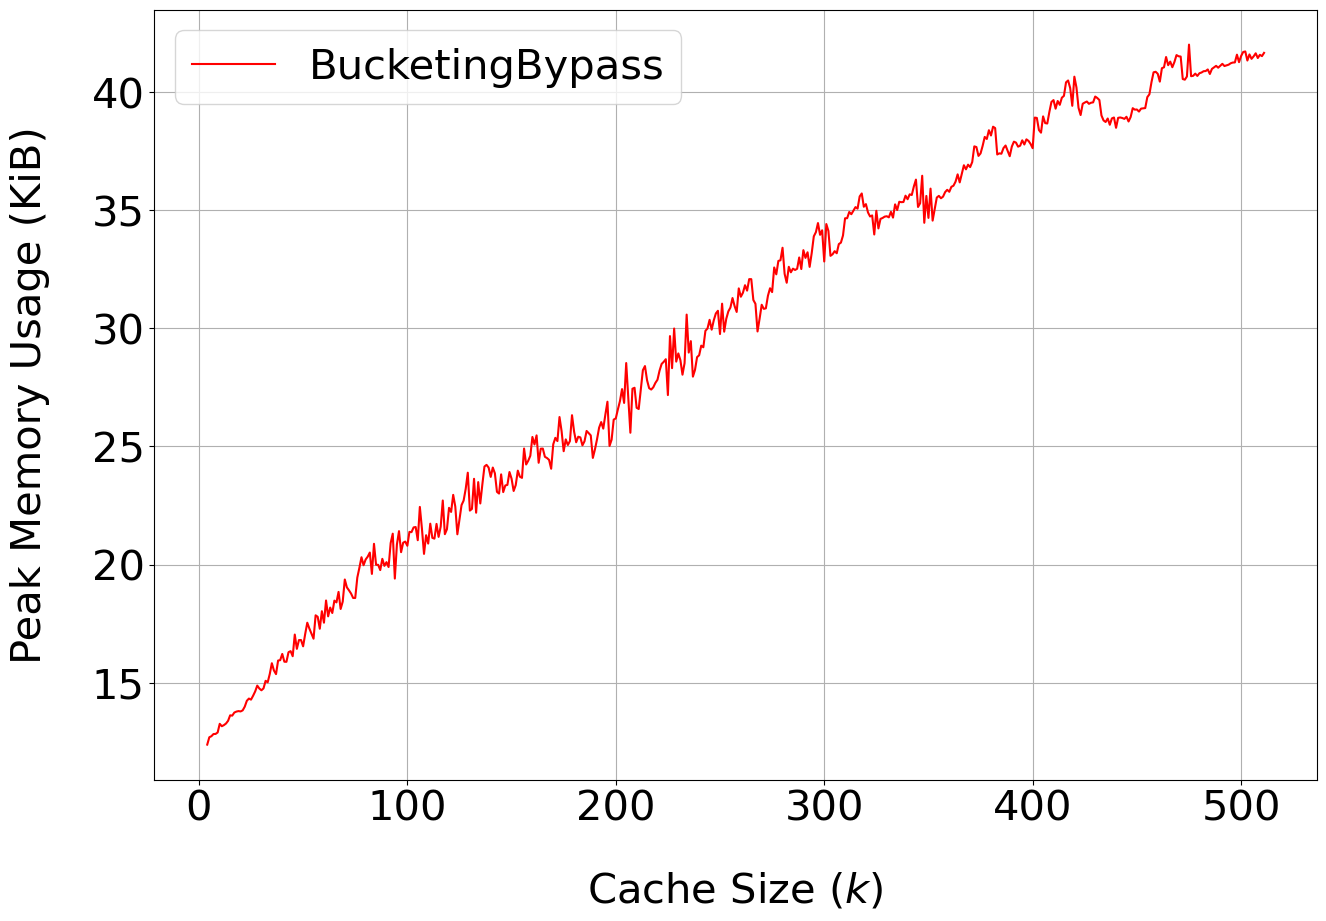

In [19]:
# n = 10
n = 10
data = res_smooth[res_smooth[:, 0]==n][:, [1,2,3]]
plt.figure(figsize=(15,10))
plt.plot(data[:,0], data[:,1]/1024, 'r', linewidth=1.5)
#plt.plot(data[data[:,0]>20,0], data[data[:,0]>20,2], 'b', linewidth=1.5)
plt.xlabel(f"Cache Size ($k$)", fontsize=30)
plt.ylabel("Peak Memory Usage (KiB)", fontsize=30)
plt.grid()
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.yaxis.labelpad = 30
ax.xaxis.labelpad = 30
plt.legend(["BucketingBypass", "TreeCaching"], fontsize=30)
plt.savefig(f"mem_usage_n={n}.png", format='png', dpi=300, bbox_inches='tight')